In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

In [3]:
# Load grayscale image
img_path = os.path.join("..", "data", "task_04", "image_04.jpg")
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

if img is None:
    raise FileNotFoundError(f"Image not found at {img_path}")

In [7]:
# Function to apply block averaging
def block_average(image, block_size):
    h, w = image.shape
    out_img = image.copy()

    for i in range(0, h - h % block_size, block_size):
        for j in range(0, w - w % block_size, block_size):
            block = image[i:i + block_size, j:j + block_size]
            avg = np.mean(block, dtype=np.float32)
            out_img[i:i + block_size, j:j + block_size] = int(avg)
    
    return out_img

In [8]:
# Apply block averaging for each block size
img_3x3 = block_average(img, 3)
img_5x5 = block_average(img, 5)
img_7x7 = block_average(img, 7)

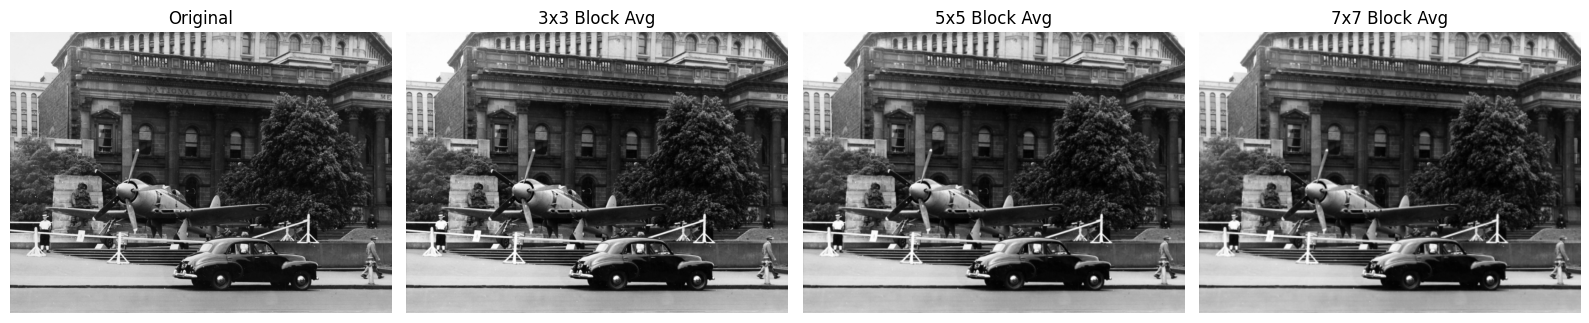

In [9]:
# Display the results
titles = ['Original', '3x3 Block Avg', '5x5 Block Avg', '7x7 Block Avg']
images = [img, img_3x3, img_5x5, img_7x7]

plt.figure(figsize=(16, 4))
for i in range(4):
    plt.subplot(1, 4, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')
plt.tight_layout()
plt.show()

In [10]:
result_dir = os.path.join("..", "results", "task_04")
os.makedirs(result_dir, exist_ok=True)

cv2.imwrite(os.path.join(result_dir, "block_avg_3x3.jpg"), img_3x3)
cv2.imwrite(os.path.join(result_dir, "block_avg_5x5.jpg"), img_5x5)
cv2.imwrite(os.path.join(result_dir, "block_avg_7x7.jpg"), img_7x7)

True